## Exploratory data analysis

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

In [134]:
filename='dataset/cry.wav'

In [135]:
import IPython.display as ipd
import librosa
import librosa.display

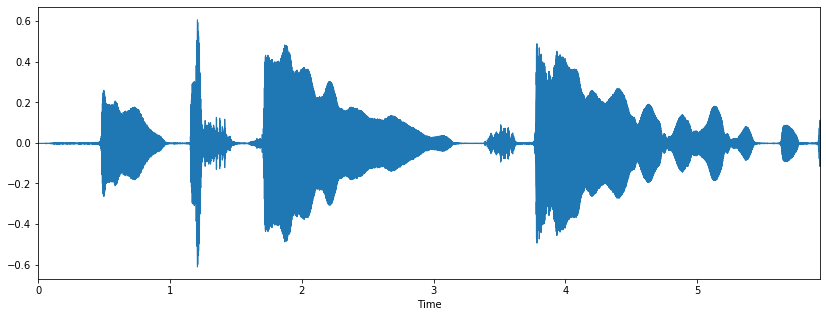

In [136]:
plt.figure(figsize = (14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr = sample_rate)
ipd.Audio(filename)

In [137]:
sample_rate

22050

In [138]:
from scipy.io import wavfile as wav
wav_sample_rate, wave_audio = wav.read(filename)

In [139]:
wav_sample_rate

16000

In [140]:
wave_audio

array([    0,     0,     0, ..., -1195,  -592,     0], dtype=int16)

In [141]:
data

array([ 0.        ,  0.        ,  0.        , ..., -0.00819657,
        0.00099229,  0.        ], dtype=float32)

In [142]:
import pandas as pd
metadata = pd.read_csv('dataset/metadata2.csv')
metadata.head(15)

,slice_file_name,fold,class_id,class
0,cry (1).wav,1,1,cry
1,cry (2).wav,1,1,cry
2,cry (3).wav,1,1,cry
3,cry (4).wav,1,1,cry
4,cry (5).wav,1,1,cry
5,cry (6).wav,1,1,cry
6,cry (7).wav,1,1,cry
7,cry (8).wav,1,1,cry
8,cry (9).wav,1,1,cry
9,cry (10).wav,1,1,cry


In [143]:
metadata['class'].value_counts()

laugh    25
cry      24
Name: class, dtype: int64

## Data Preprocessing

In [144]:
import librosa
audio_file_path = 'dataset/laugh (1).wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [145]:
print(librosa_audio_data)

[ 0.000000e+00  0.000000e+00  0.000000e+00 ... -6.858751e-04  6.737236e-05
  0.000000e+00]


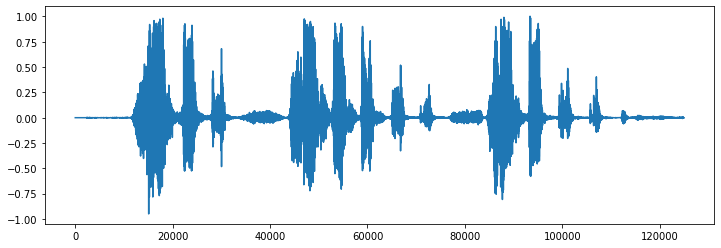

In [146]:
plt.figure(figsize = (12,4))
plt.plot(librosa_audio_data)

## Observation

In [147]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path)

In [148]:
wave_audio

array([  0,   0,   0, ..., -36, -38,   0], dtype=int16)

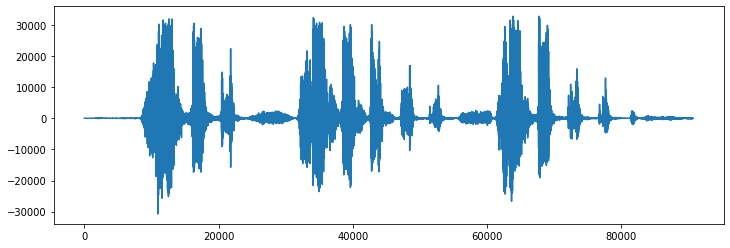

In [149]:
plt.figure(figsize = (12,4))
plt.plot(wave_audio)

extract features

In [150]:
mfccs = librosa.feature.mfcc(y = librosa_audio_data, sr = librosa_sample_rate, n_mfcc = 40)
print(mfccs.shape)

(40, 245)


In [151]:
mfccs

array([[-5.79692298e+02, -5.79692298e+02, -5.77897144e+02, ...,
        -5.01305287e+02, -5.13167847e+02, -5.37795172e+02],
       [ 0.00000000e+00,  0.00000000e+00,  2.52062149e+00, ...,
         5.07232846e+01,  5.41927899e+01,  5.35657410e+01],
       [ 0.00000000e+00,  0.00000000e+00,  2.46682566e+00, ...,
         1.79752596e+01,  2.30013599e+01,  4.21937610e+01],
       ...,
       [ 0.00000000e+00,  0.00000000e+00, -1.07298267e+00, ...,
        -1.54333199e-01, -2.76824468e+00, -5.83646462e+00],
       [ 0.00000000e+00,  0.00000000e+00, -9.66578872e-01, ...,
         1.23428353e+00, -3.84696263e+00, -6.14943461e+00],
       [ 0.00000000e+00,  0.00000000e+00, -8.57171196e-01, ...,
         4.02084165e+00, -3.30228640e+00, -5.85212463e+00]])

In [152]:
import pandas as pd
import os
import librosa
audio_dataset_path = 'dataset/'
metadata = pd.read_csv('dataset/metadata2.csv')
metadata.head()

,slice_file_name,fold,class_id,class
0,cry (1).wav,1,1,cry
1,cry (2).wav,1,1,cry
2,cry (3).wav,1,1,cry
3,cry (4).wav,1,1,cry
4,cry (5).wav,1,1,cry


In [153]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfcss_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
    mfcss_scaled_features = np.mean(mfccs.T,axis = 0)
    return mfcss_scaled_features

In [154]:
import numpy as np
from tqdm import tqdm

extracted_features = []
for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row['fold']) + '/', str(row['slice_file_name']))
    final_class_labels = row['class']
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

49it [00:05, 10.09it/s]


In [155]:
extracted_features_df = pd.DataFrame(extracted_features,columns = ['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-286.52198351650003, 129.93930326821018, -40....",cry
1,"[-286.52198351650003, 129.93930326821018, -40....",cry
2,"[-286.52198351650003, 129.93930326821018, -40....",cry
3,"[-286.52198351650003, 129.93930326821018, -40....",cry
4,"[-286.52198351650003, 129.93930326821018, -40....",cry


In [156]:
X = np.array(extracted_features_df['feature'].tolist())
y = np.array(extracted_features_df['class'].tolist())

In [157]:
X.shape

(49, 40)

In [158]:
y

array(['cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry',
       'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'cry',
       'cry', 'cry', 'cry', 'cry', 'cry', 'cry', 'laugh', 'laugh',
       'laugh', 'laugh', 'laugh', 'laugh', 'laugh', 'laugh', 'laugh',
       'laugh', 'laugh', 'laugh', 'laugh', 'laugh', 'laugh', 'laugh',
       'laugh', 'laugh', 'laugh', 'laugh', 'laugh', 'laugh', 'laugh',
       'laugh', 'laugh'], dtype='<U5')

In [159]:
#from sklearn.preprocessing import LabelEncoder
#label_encoder = LabelEncoder()
#y = np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(y))

In [160]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [161]:
X_train.shape

(39, 40)

In [162]:
X_test.shape

(10, 40)

In [163]:
y_train.shape

(39, 2)

In [164]:
y_test.shape

(10, 2)

## Define The Model

In [165]:
import tensorflow as tf
print(tf.__version__)

1.14.0


In [178]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [179]:
num_labels = y.shape[1]

In [181]:
Dense

tensorflow.python.keras.layers.core.Dense

In [245]:
model = Sequential()

model.add(Dense(100, input_shape = (40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('sigmoid'))

In [246]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 100)               4100      
_________________________________________________________________
activation_39 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_28 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_44 (Dense)             (None, 100)               10100     
_________________________________________________________________
activation_40 (Activation)   (None, 100)               0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 2)               

In [247]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [248]:
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
from datetime import datetime

num_epochs = 100
num_batch_size = 128

checkpointer = ModelCheckpoint(filepath = 'saved_model/audio_classification.hdf5', monitor='val_accuracy', mode='max',
                              verbose = 1, save_best_only = True)
#es = EarlyStopping(monitor='val_acc', mode='min', verbose=1)
#mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size = num_batch_size, epochs = num_epochs, validation_data = (X_test, y_test), callbacks = [checkpointer])

duration = datetime.now() - start
print('Training completed in time: ', duration)

Train on 39 samples, validate on 10 samples
Epoch 1/100
39/39 [==============================] - 1s 30ms/sample - loss: 19.7283 - acc: 0.4872 - val_loss: 6.3030 - val_acc: 0.7000
Epoch 2/100
39/39 [==============================] - 0s 164us/sample - loss: 18.9412 - acc: 0.5256 - val_loss: 3.7224 - val_acc: 0.7000
Epoch 3/100
39/39 [==============================] - 0s 261us/sample - loss: 17.2097 - acc: 0.5128 - val_loss: 2.1017 - val_acc: 0.5000
Epoch 4/100
39/39 [==============================] - 0s 208us/sample - loss: 14.1361 - acc: 0.5256 - val_loss: 2.6188 - val_acc: 0.5000
Epoch 5/100
39/39 [==============================] - 0s 226us/sample - loss: 13.6244 - acc: 0.5256 - val_loss: 3.3817 - val_acc: 0.3000
Epoch 6/100
39/39 [==============================] - 0s 343us/sample - loss: 13.1020 - acc: 0.5641 - val_loss: 5.7061 - val_acc: 0.3000
Epoch 7/100
39/39 [==============================] - 0s 254us/sample - loss: 13.5856 - acc: 0.5256 - val_loss: 7.4595 - val_acc: 0.3000
Epoch

In [249]:
test_accuracy = model.evaluate(X_test, y_test, verbose = 0)
print(test_accuracy[1])

0.7


## Prediction

In [250]:
filename = 'dataest/cry (15).wav'
prediction_feature = features_extractor(filename)
prediction_feature = prediction_feature.reshape(1,-1)
model.predict_classes(prediction_feature)

array([1], dtype=int64)

In [251]:
metadata['class'].unique()

array(['cry', 'laugh'], dtype=object)

In [255]:
filename ='dataset/cry.wav'
audio, sample_rate = librosa.load(filename, res_type = 'kaiser_fast')
mfccs_features = librosa.feature.mfcc(y = audio, sr = sample_rate, n_mfcc = 40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis = 0)

print(mfccs_scaled_features)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label = model.predict_classes(mfccs_scaled_features)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label)
prediction_class

[-3.99796210e+02  7.61916879e+01  2.29104243e+01  1.78994204e+01
 -9.46345203e+00 -8.37782141e+00 -2.30969932e+01 -8.33863294e+00
 -2.56960907e+01 -1.12048259e+01 -4.06579409e+00 -1.72544558e+01
 -6.37701202e-01 -1.03955494e+01  3.92861247e-01 -4.86109754e+00
 -8.36029314e-01  9.16748352e+00  3.13889915e-01  1.25635532e+01
  1.67441403e+01  1.59193494e+01  8.10379443e+00  4.89416942e+00
  9.72422597e-01 -5.65110162e+00 -1.07444778e+00 -2.42749227e+00
 -8.09188618e+00 -9.99735635e+00 -7.89429423e+00 -5.86878411e+00
 -5.88733547e+00 -1.01072932e+01 -6.43957097e+00 -5.52161135e+00
 -5.48039601e+00  1.24237941e+00 -2.31556260e+00  2.03829662e+00]
[[-3.99796210e+02  7.61916879e+01  2.29104243e+01  1.78994204e+01
  -9.46345203e+00 -8.37782141e+00 -2.30969932e+01 -8.33863294e+00
  -2.56960907e+01 -1.12048259e+01 -4.06579409e+00 -1.72544558e+01
  -6.37701202e-01 -1.03955494e+01  3.92861247e-01 -4.86109754e+00
  -8.36029314e-01  9.16748352e+00  3.13889915e-01  1.25635532e+01
   1.67441403e+01  

array(['cry'], dtype='<U5')